## Advanced MLP

Using advanced techniques for training neural network:
* Weight Initialization
* Nonlinearity (Activation Function)
* Optimizers
* Batch Normalization
* Dropout (Regularization)
* Model Ensemble

#### Import Necessary Packages

In [89]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

#### Load the Dataset

In [90]:
# MNIST database of handwritten digits
# into training and testing dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

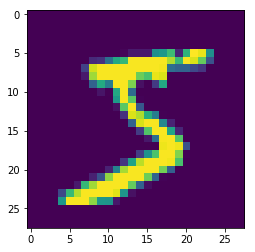

Label:  5


In [3]:
# show first number in the dataset
plt.imshow(X_train[0])
plt.show()
print('Label: ', y_train[0])

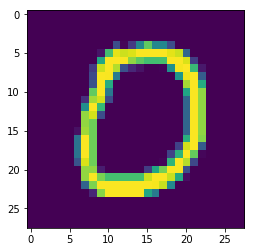

Label:  0


In [4]:
# show tenth number in the dataset
plt.imshow(X_test[10])
plt.show()
print('Label: ',y_test[10])

In [91]:
# reshaping X data (features): (n, 28, 28) => (n, 784)
# Input image is a colorful image, 3 channel(RGB),
# while the network expects a gray image, one channel
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [92]:
# spliting the dataset 
# using 33% of the training data to expedite the training process
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)

In [93]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [94]:
# looking at our reformed dataset
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (19800, 784)
X_test:  (10000, 784)
y_train:  (19800, 10)
y_test:  (10000, 10)


#### Create basic MLP Model

In [9]:
# Import packages
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [10]:
# create model
model = Sequential()

In [11]:
# add layers
model.add(Dense(50, input_shape= (784,), activation = 'sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))

In [12]:
# model compiling
sgd = optimizers.SGD(lr = 0.001) # stochastic gradient descent optimizer
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
# summry of model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 47,410
Trainable params: 47,410
Non-trainable params: 0
_________________________________________________________________


##### Conclusion:
1. for ```dense_1``` layer: no. of param(39250) = no. of input values(784) * neurons in first layer(50) + bias value(50)
2. for ```dense_2``` layer: no. of param(2550) = no. of input values(50) * neurons in second layer(50) + bias value(50)
3. for ```dense_3``` layer: no. of param(2550) = no. of input values(50) * neurons in third layer(50) + bias value(50)
4. for ```dense_4``` layer: no. of param(2550) = no. of input values(50) * neurons in fourth layer(50) + bias value(50)
5. for ```dense_5``` layer: no. of param(510) = no. of input values(50) * neurons in last layer(10) + bias value(10)

##### Training Model
##### one epoch = 
one forward pass and one backward pass of all the training examples
##### batch size = 
the number of training examples in one forward/backward pass. The hgher the batch size the more memory space you'll need
##### Example: 
If you have 1000 training examples, and your batch size is 500, then it takes 2 iterations to complete 1 epoch.

In [18]:
# Train the model
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 100, verbose = 0)

In [19]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 55us/step


In [20]:
print('Test accuracy: ', results[1])

Test accuracy:  0.1135


##### Conclusion:
1. Parameters Used: <b>```Sigmoid```</b> activation function at input layers and <b>```Softmax```</b> activation function at output layers.
2. Accuracy on Testing Dataset is <b>```11.35%```</b>.

#### 1. Weight Initialization
* Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree
* Initializations define the way to set the initial random weights of keras layers.
* He normal initializer draws samples from a truncated normal distribution centered on 0 with ```stddev = sqrt(2 / fan_in)``` where ```fan_in``` is the number of input units in the weight tensor.

In [24]:
# create a function to generate (return) models

def mlp_model():
    model = Sequential()
    model.add(Dense(50, input_shape = (784, ), kernel_initializer = 'he_normal', activation= 'sigmoid'))
    model.add(Dense(50, kernel_initializer= 'he_normal', activation= 'sigmoid'))
    model.add(Dense(50, kernel_initializer= 'he_normal', activation= 'sigmoid'))
    model.add(Dense(50, kernel_initializer= 'he_normal', activation= 'sigmoid'))
    model.add(Dense(10, kernel_initializer= 'he_normal', activation= 'softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer= sgd, loss= 'categorical_crossentropy', metrics= ['accuracy'])
    
    return model

In [25]:
model = mlp_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_12 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_13 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_14 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                510       
Total params: 47,410
Trainable params: 47,410
Non-trainable params: 0
_________________________________________________________________


##### Verbose can be 0, 1 or 2
1. verbose= 0: will show you nothing
2. verbose= 1: will show you animated progress bar 
3. verbose= 2: will just mention the number of epochs

In [28]:
model.fit(X_train, y_train, validation_split= 0.3, epochs= 100, verbose= 0)

In [29]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 46us/step


In [30]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7552


##### Conclusion:
1. Parameters Used: <b>```Sigmoid```</b> activation function at input layers, <b>```Softmax```</b> activation function at output layer, and <b>```he_normal```</b> as the kernel initializer.
2. Accuracy on testing dataset is <b>```75.52%```</b>.

#### 2. Nonlinearity(Activation function)
* Sigmoid functions suffer from gradient vanishing problem, making training slower.
* Choices apart from sigmoid and tanh are:
  * <b>```relu```</b>(rectified linear unit)
  * <b>```selu```</b>(scaled exponential linear unit)

In [33]:
# create a function to generate (return) model
def mlp_nonlinear_model():
    model = Sequential()
    # adding layers
    model.add(Dense(50, input_shape= (784, ), activation= 'relu'))
    model.add(Dense(50, activation= 'relu'))
    model.add(Dense(50, activation= 'relu'))
    model.add(Dense(50, activation= 'relu'))
    model.add(Dense(10, activation= 'softmax'))
    
    sgd = optimizers.SGD(lr= 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics= ['accuracy'])
    
    return model

In [34]:
model = mlp_nonlinear_model()
model.fit(X_train, y_train, validation_split= 0.3, epochs= 100, verbose= 0)

In [35]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 55us/step


In [36]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9288


##### Conclusion:
1. <b>```Parameters Used```</b>: <b>Relu</b> as activation function for input layers, and <b>Softmax</b> as activation function for output layer.
2. Accuracy on testing dataset is <b>```92.88%```</b>.

#### 3. Optimizers (Adam:Adaptive Moment Estimation)

In [39]:
def mlp_adam_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape= (784, ), activation= 'sigmoid'))
    model.add(Dense(50, activation= 'sigmoid'))
    model.add(Dense(50, activation= 'sigmoid'))
    model.add(Dense(50, activation= 'sigmoid'))
    model.add(Dense(10, activation= 'softmax'))
    
    adam= optimizers.Adam(lr= 0.001)
    model.compile(optimizer= adam, loss= 'categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [41]:
model = mlp_adam_model()
model.fit(X_train, y_train, validation_split= 0.3, epochs= 100, verbose=0)

In [42]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 66us/step


In [43]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9259


##### Conclusion:
1. <b>Parameters Used</b>: <b>```Sigmoid```</b> activation for input layers, <b>```Softmax```</b> activation function for output layer, and <b>```Adam```</b> as an optimizer.
2. Accuracy on testing datset is <b>```92.59%```</b>.

In [49]:
## Using Adam as optimizer and Relu as activation function

def mlp_adam_relu_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape= (784, ), activation= 'relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    adam = optimizers.Adam(lr= 0.001)
    model.compile(optimizer = adam, loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [50]:
model = mlp_adam_relu_model()
model.fit(X_train, y_train, validation_split= 0.3, epochs= 100, verbose= 0)

In [52]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 55us/step


In [53]:
print('Test_accuracy: ', results[1])

Test_accuracy:  0.9385


##### Conclusion:
1. <b>Parameters Used</b>: <b>```Relu```</b> as an activation function for input layers, <b>```Softmax```</b> as an activation function for output layer, and <b>```Adam```</b> as an optimizer.
2. Accuracy on testing dataset is <b>```93.85%```</b>.

#### 4. Batch Normalization
1. It is one of the method to prevent the "internal covariance shift" problem, has proven to be highly effective.
2. Normalize each mini-batch before nonlinearity
3. Batch Normalization layer is usually inserted after dense/convolution and before nonlinearity.

In [54]:
from keras.layers import BatchNormalization

In [55]:
def mlp_batch_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape= (784, )))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sdg = optimizers.SGD(lr = 0.001)
    model.compile(optimizer= sgd, loss= 'categorical_crossentropy', metric=['accuracy'])
    
    return model

In [56]:
model.fit(X_train, y_train, validation_split=0.3, epochs= 100, verbose= 0)

In [57]:
results= model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 62us/step


In [58]:
print('Test_accuracy: ', results[1])

Test_accuracy:  0.9546


##### Conclusion:
1. <b>Parameters Used</b>: <b>```Sigmoid```</b> as an activation function for input layers, and <b>```Softmax```</b> as an activation function for output layer, and using <b>```BatchNormalization```</b> after dense and before activation.
2. Accuracy on testing dataset is <b>```95.46%```</b>.

In [64]:
## Using BatchNormalization along with relu as an activation function

def mlp_batch_relu_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape=(784, )))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr= 0.01)
    model.compile(optimizer= sgd, loss= 'categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [65]:
model = mlp_batch_relu_model()
model.fit(X_train, y_train, validation_split= 0.3, epochs= 100, verbose= 0)

In [66]:
results= model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 78us/step


In [67]:
print('Test_accurracy: ', results[1])

Test_accurracy:  0.9471


##### Conclusion:
1. <b>Parameters Used</b>: <b>```Relu```</b> as an activation function for input layers, and <b>```Softmax```</b> as an activation function for output layer, and using <b>```BatchNormalization```</b> after dense and before activation layer.
2. Accuracy on testing dataset is <b>```94.71%```</b>.

#### 5. Dropout (Regularization)
1. Dropout is one of the pwerful ways to prevent overfitting.
2. The idea is to disconnecting some(randomly selected) neurons in each layer
3. Dropout Rate is the probability of each neuron to be disconnected.

In [68]:
from keras.layers import Dropout

In [69]:
def mlp_dropout_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape=(784, ), activation= 'sigmoid'))
    model.add(Dropout(0.2))
    
    model.add(Dense(50, activation= 'sigmoid'))
    model.add(Dropout(0.2))
    
    model.add(Dense(50, activation= 'sigmoid'))
    model.add(Dropout(0.2))
    
    model.add(Dense(50, activation= 'sigmoid'))
    model.add(Dropout(0.2))
    
    model.add(Dense(10, activation= 'softmax'))
    
    sdg = optimizers.SGD(lr= 0.001)
    
    model.compile(optimizer = sdg, loss= 'categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [70]:
model = mlp_dropout_model()
model.fit(X_train, y_train, validation_split = 0.3, epochs= 100, verbose= 0)

In [71]:
results= model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 71us/step


In [72]:
print('Test_accuracy: ', results[1])

Test_accuracy:  0.1135


##### Conclusion:
1. <b>Parameters Used</b>: <b>```Sigmoid```</b> as an activation function for input layers, and <b>```Softmax```</b> as an activation function for output layer, and using <b>```Dropout```</b> after activation layer.
2. Accuracy on testing dataset is <b>```11.35%```</b>.

#### 6. Model Ensemble
1. It is a reliable and promising way to boost performance of the model
2. Usually create 8 to 10 independent networks and merge their results.

In [86]:
import numpy as np

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [95]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

In [96]:
def mlp_ensemble_model():
    model= Sequential()
    
    model.add(Dense(50, input_shape=(784, ), activation= 'sigmoid'))
    model.add(Dense(50, activation= 'sigmoid'))
    model.add(Dense(50, activation= 'sigmoid'))
    model.add(Dense(50, activation= 'sigmoid'))
    model.add(Dense(10, activation= 'softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer= sgd, loss= 'categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [97]:
model1 = KerasClassifier(build_fn= mlp_ensemble_model, epochs= 100, verbose= 0)
model2 = KerasClassifier(build_fn= mlp_ensemble_model, epochs= 100, verbose= 0)
model3 = KerasClassifier(build_fn= mlp_ensemble_model, epochs= 100, verbose= 0)

In [98]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

In [99]:
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('model1', <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001312DEB94E0>), ('model2', <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001312DEB9550>), ('model3', <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001312DEB95C0>)],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [100]:
y_pred = ensemble_clf.predict(X_test)

C:\Users\Praneet\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [101]:
print('Test accuracy: ', accuracy_score(y_pred, y_test))

Test accuracy:  0.2793


##### Conclusion:
1. <b>Parameters Used</b>: <b>```Sigmoid```</b> as an activation function for input layers, and <b>```Softmax```</b> as an activation function for output layer, and using <b>```Model Ensemble```</b>.
2. Accuracy on testing dataset is <b>```27.93%```</b>.

## Summary

| Model         | Testing Accuracy (%) | 
| ------------- |:----------------:    | 
| Basic Model   | 11.35                | 
| He Normal     | 75.52                | 
| Relu          | 92.88                | 
| Adam          | 92.59                | 
| Adam & Relu   | 93.85                | 
| Batchnorm     | 95.46                |
| Batchnorm & Relu | 94.71                |
| Dropout       | 11.35                |
| Ensemble      | 27.93                |

### Note : 
##### Most methods improve the model training & test performance. That's why we will use them all together.